# Problem Statement

-> Build a email spam classifier using Naive Bayes


In [38]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data=pd.read_csv("/content/emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
data['spam'].value_counts()

,count
spam,
0,4360
1,1368


In [5]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
ham= data[data['spam']==0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spam = data[data['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [9]:
print("Spam % :- ", (len(spam)/len(data))*100,'%')

print("ham % :- ", (len(ham)/len(data))*100,'%')

Spam % :-  23.88268156424581 %
ham % :-  76.11731843575419 %


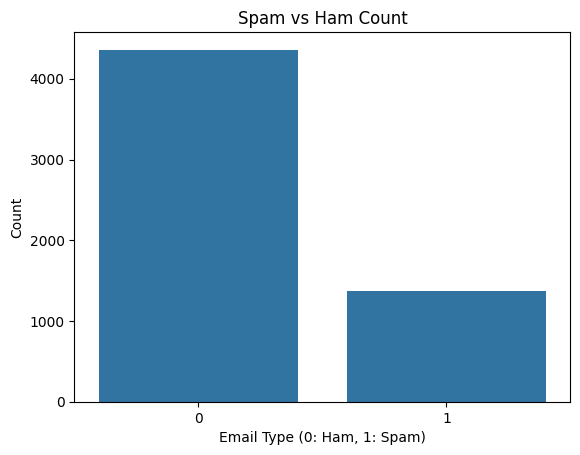

In [10]:

sns.countplot(x='spam', data=data)
plt.title('Spam vs Ham Count')
plt.xlabel('Email Type (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [11]:
# Example
sample_data = ["Malav Joshi. I work for TD Insurance.My plan is to transition into Data Analytics job."]

sample_count= CountVectorizer()
X = sample_count.fit_transform(sample_data)
print(X.toarray())

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [12]:
print(sample_count.get_feature_names_out())

['analytics' 'data' 'for' 'insurance' 'into' 'is' 'job' 'joshi' 'malav'
 'my' 'plan' 'td' 'to' 'transition' 'work']


In [13]:
# Applying Countvectorizer to dataset

Vectorizer=CountVectorizer()

data_countvectorizer = Vectorizer.fit_transform(data['text'])
data_countvectorizer

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [14]:
print(Vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [15]:
print(data_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
data_countvectorizer.shape

(5728, 37303)

In [21]:
label=data['spam'].values
label


array([1, 1, 1, ..., 0, 0, 0])

In [22]:
# Train the Model

model = MultinomialNB()
model.fit(data_countvectorizer,label)


MultinomialNB()

In [29]:
test_sample=['Free money!!!',\
             'hope you are doing well. Just a reminder that we have a team meeting tomorrow at 10 AM in the conference room.']

test_countvectorizer = Vectorizer.transform(test_sample)
test_countvectorizer

<2x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [30]:
model.predict(test_countvectorizer)

array([1, 0])

In [34]:
X = data_countvectorizer
X.shape

(5728, 37303)

In [33]:
y = label
y

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
# Divide data in train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:

model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB()

In [42]:
# Evaluating the model

pred_train = model.predict(X_train)
print(pred_train)

pred_test = model.predict(X_test)
print(pred_test)


[0 0 0 ... 0 0 1]
[0 0 0 ... 1 0 0]


[[3494   10]
 [   1 1077]]


<Axes: >

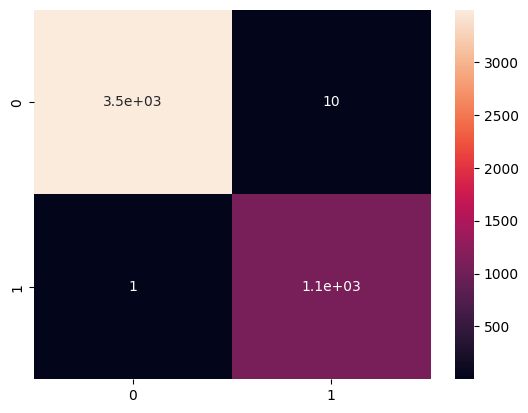

In [48]:
cm_train = confusion_matrix(y_train,pred_train)
print(cm_train)
sns.heatmap(cm_train,annot=True)

[[848   8]
 [  2 288]]


<Axes: >

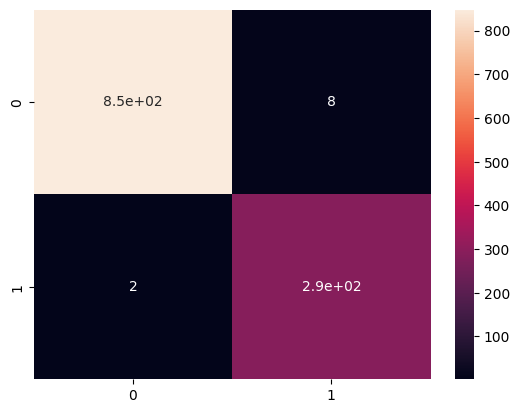

In [49]:
cm_test = confusion_matrix(y_test,pred_test)
print(cm_test)
sns.heatmap(cm_test,annot=True)

In [51]:
report= classification_report(y_test,pred_test,output_dict=True)
report

{'0': {'precision': 0.9976470588235294,
  'recall': 0.9906542056074766,
  'f1-score': 0.9941383352872216,
  'support': 856.0},
 '1': {'precision': 0.972972972972973,
  'recall': 0.993103448275862,
  'f1-score': 0.9829351535836177,
  'support': 290.0},
 'accuracy': 0.9912739965095986,
 'macro avg': {'precision': 0.9853100158982513,
  'recall': 0.9918788269416694,
  'f1-score': 0.9885367444354196,
  'support': 1146.0},
 'weighted avg': {'precision': 0.9914031802051512,
  'recall': 0.9912739965095986,
  'f1-score': 0.9913033242103935,
  'support': 1146.0}}

In [53]:

report=pd.DataFrame(report).transpose()
report

,0,1,accuracy,macro avg,weighted avg
precision,0.997647,0.972973,0.991274,0.985310,0.991403
recall,0.990654,0.993103,0.991274,0.991879,0.991274
f1-score,0.994138,0.982935,0.991274,0.988537,0.991303
support,856.000000,290.000000,0.991274,1146.000000,1146.000000
